<a href="https://colab.research.google.com/github/wikibook/machine-learning/blob/2.0/jupyter_notebook/4.2_농구선수_데이터분석.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리 임포트
실습에 필요한 라이브러리를 임포트합니다.

In [19]:
import pandas as pd
import numpy as np

# sklearn train_test_split의 동일한 결과 출력을 위해 선언합니다.
np.random.seed(5)

# 문제 정의

농구 선수의 경기 기록을 바탕으로, 그 선수의 포지션을 예측해보도록 하겠습니다.

# 데이터 수집

In [20]:
# 데이터를 수집합니다
df = pd.read_csv("https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_stat.csv")

In [21]:
# 수집된 데이터 샘플을 확인합니다
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [22]:
# 현재 가지고 있는 데이터에서, 포지션의 갯수를 확인한다
df.Pos.value_counts()

C     50
SG    50
Name: Pos, dtype: int64

# 데이터 시각화

데이터를 특징을 바탕으로 한 공간에 시각화함으로써,우리는 머신러닝 학습에 필요한 특징과 불필요한 특징을 쉽게 구분지을 수 있습니다.

Text(0.5,1,'STL and 2P in 2d plane')

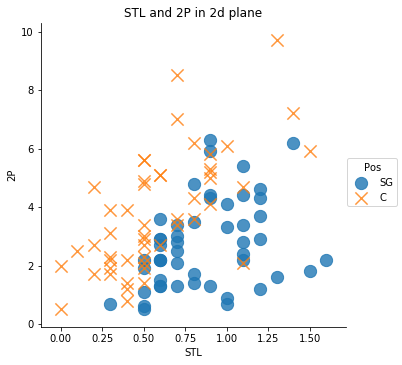

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 스틸, 2점슛 데이터 시각화
sns.lmplot(x='STL', y='2P', data=df, fit_reg=False,  # x 축, y 축, 데이터, 라인 없음
           scatter_kws={"s": 150}, # 좌표 상의 점의 크기
           markers=["o", "x"],
           hue="Pos") # 예측값

# title
plt.title('STL and 2P in 2d plane')

Text(0.5,1,'AST and 2P in 2d plane')

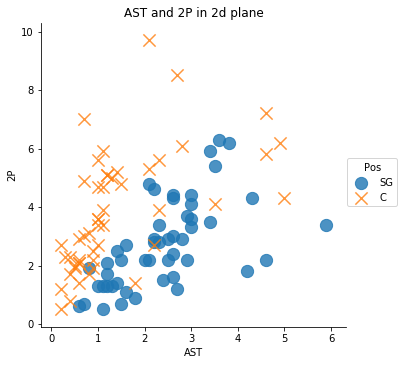

In [24]:
# 어시스트, 2점슛 데이터 시각화
sns.lmplot(x='AST', y='2P', data=df, fit_reg=False,  # x 축, y 축, 데이터, 라인 없음
           scatter_kws={"s": 150}, # 좌표 상의 점의 크기
           markers=["o", "x"],
           hue="Pos") # 예측값

# title
plt.title('AST and 2P in 2d plane')

Text(0.5,1,'BLK and 3P in 2d plane')

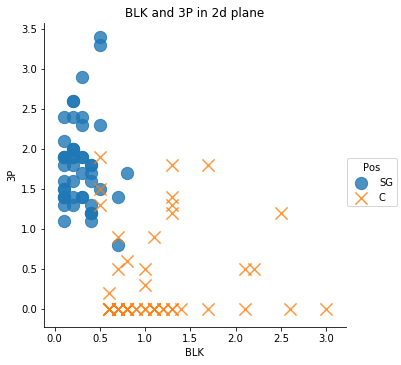

In [25]:
# 블로킹, 3점슛 데이터 시각화
sns.lmplot(x='BLK', y='3P', data=df, fit_reg=False,  # x 축, y 축, 데이터, 라인 없음
           scatter_kws={"s": 150}, # 좌표 상의 점의 크기
           markers=["o", "x"],
           hue="Pos") # 예측값

# title
plt.title('BLK and 3P in 2d plane')

Text(0.5,1,'TRB and 3P in 2d plane')

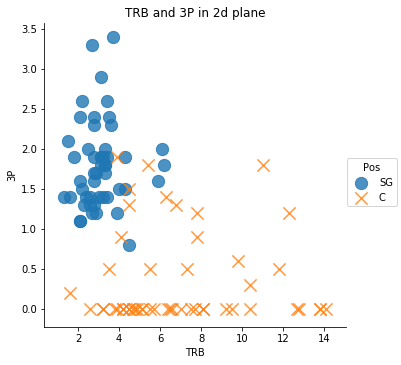

In [26]:
# 리바운드, 3점슛 데이터 시각화
sns.lmplot(x='TRB', y='3P', data=df, fit_reg=False,  # x 축, y 축, 데이터, 라인 없음
           scatter_kws={"s": 150}, # 좌표 상의 점의 크기
           markers=["o", "x"],
           hue="Pos") # 예측값

# title
plt.title('TRB and 3P in 2d plane')

# 데이터 다듬기

In [27]:
# 분별력이 없는 특징(feature)을 데이터에서 제거합니다
df.drop(['2P', 'AST', 'STL'], axis=1, inplace = True)

# 데이터 나누기 (학습 데이터, 테스트 데이터)

In [28]:
# sklearn의 train_test_split을 사용하면 라인 한줄로 손쉽게 데이터를 나눌 수 있다
from sklearn.model_selection import train_test_split

# 다듬어진 데이터에서 20%를 테스트 데이터로 분류합니다
train, test = train_test_split(df, test_size=0.2)

In [29]:
# 학습 데이터의 갯수를 확인합니다, 80개의 데이터가 있습니다.
train.shape[0]

80

In [30]:
# 테스트 데이터의 갯수를 확인합니다. 20개의 데이터가 있습니다.
test.shape[0]

20

# 다듬어진 데이터 저장 위치
다듬어진 데이터는 아래 위치에 저장해놓았습니다.  
머신러닝 분류 알고리즘 실습 시에 사용하도록 하겠습니다.  
학습 데이터 위치: https://github.com/wikibook/machine-learning/blob/2.0/data/csv/basketball_train.csv  
테스트 데이터 위치: https://github.com/wikibook/machine-learning/blob/2.0/data/csv/basketball_test.csv

In [31]:
#train.to_csv("../data/csv/basketball_train.csv", index = None)

In [32]:
#test.to_csv("../data/csv/basketball_test.csv", index = None)